# Project statistics Youtube

## Imports used

In [41]:
import json
from pytube import YouTube
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd
from matplotlib.dates import DateFormatter, DayLocator

## All methods used

In [2]:
def get_video_duration(video_url):
    try:
        yt = YouTube(video_url)
        duration_sec = yt.length
        return duration_sec
    except Exception as e:
        print(f"Error fetching duration for {video_url}: {e}")
        return 0
    
def calculate_nb_videos(json_data):
    return len(json_data)

def calculate_total_watch_time(json_data):
    total_watch_time_seconds = 0

    # Iterate through each video entry in the JSON data
    channels = {}
    new_json = []
    for entry in json_data:
        if 'subtitles' in entry and 'titleUrl' in entry:
            # Extract the duration from the subtitles (assuming it's available)
            url = entry['titleUrl']
            duration = get_video_duration(url)
            # Convert the duration to seconds and add to the total
            total_watch_time_seconds += duration
            # top channel watching time
            channel = entry['subtitles'][0]['name']
            if channel in channels:
                channels[channel] +=duration
            else:
                channels[channel] = duration
            # create new json
            video = {}
            video['title'] = entry['title'][18:]
            video['channel'] = entry['subtitles'][0]['name']
            video['duration'] = duration
            video['time'] = entry['time'][:10]
            new_json.append(video)

    # Convert the total watch time to hours
    total_watch_time_hours = total_watch_time_seconds / 3600

    return total_watch_time_hours, channels, new_json

def to_table(channels):

    # Conversion du temps de secondes en heures
    temps_en_heures = {chaine: temps / 3600 for chaine, temps in channels.items()}

    # Tri des chaînes en fonction du temps passé
    chaînes_triées = sorted(temps_en_heures.items(), key=lambda x: x[1], reverse=True)

    # Séparation des noms de chaînes et des temps
    noms_chaines, temps_passé = zip(*chaînes_triées)

    # Création du tableau
    table = PrettyTable()
    table.field_names = ["Chaîne", "Temps passé (heures)"]

    for chaîne, temps in chaînes_triées:
        table.add_row([chaîne, f"{temps:.2f}"])

    return table

In [3]:

# Specify the path to your YouTube watch history JSON file
file_path = 'ressources/watch-history.json'

try:
    # Load the JSON data
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Calculate the total watch time
    total_watch_time, channels, new_json = calculate_total_watch_time(data)

    print(f'Total Watch Time: {total_watch_time:.2f} hours')
        
    # Calculate number of videos watched
    nb_videos = calculate_nb_videos(data)
    print(f"Nombre de vidéos regardées: {nb_videos}")

    # show diagram
    table = to_table(channels)
        
except FileNotFoundError:
    print(f'Error: File not found at {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

Error fetching duration for https://www.youtube.com/watch?v=46wn_7c0LwU: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
Error fetching duration for https://www.youtube.com/watch?v=STfIa9ruGz4: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
Error fetching duration for https://www.youtube.com/watch?v=1OjJbEf8Rn4: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
Error fetching duration for https://www.youtube.com/watch?v=Nvd31I_8Dgs: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
Error fetching duration for https://www.youtube.com/watch?v=Nvd31I_8Dgs: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
Error fetching duration for https://www.youtube.com/watch?v=OiNiQVVw9nI: int() argument must be a string, a bytes-like object or a number, not 'NoneType'
Error fetching duration for https://www.youtube.com/watch?v=pG36JuskStY: int

In [4]:
with open('out/data.json', 'w', encoding='utf-8') as f:
    json.dump(new_json, f, ensure_ascii=False, indent=4)

In [37]:
df = pd.DataFrame(new_json)


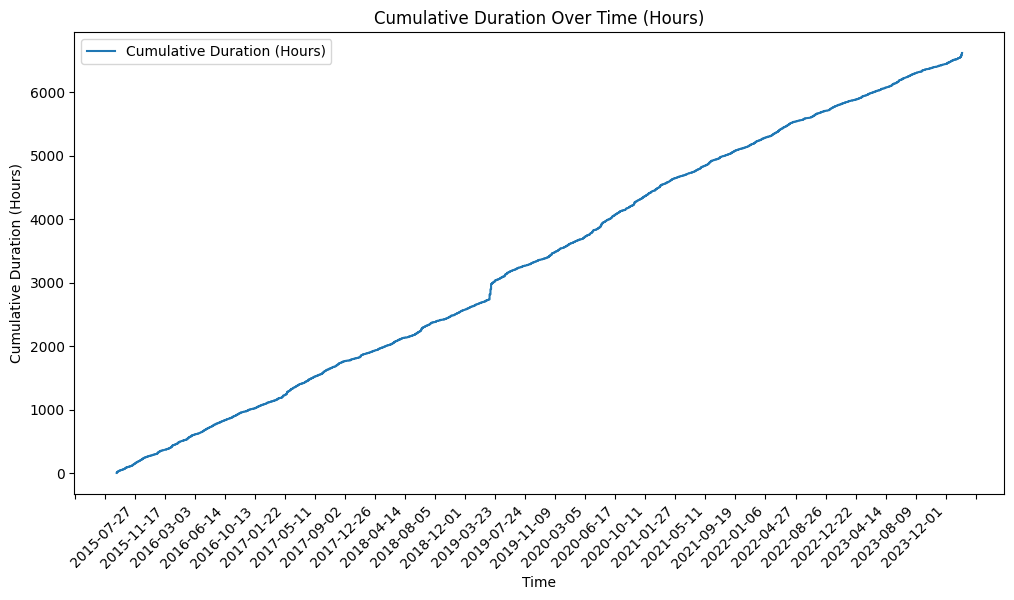

In [45]:
# Sort DataFrame by 'time' column
df.sort_values(by='time', inplace=True)

# Calculate the cumulative sum of the 'duration' column in seconds
df['cumulative_duration'] = df['duration'].cumsum()

# Convert cumulative duration from seconds to hours
df['cumulative_duration_hours'] = df['cumulative_duration'] / 3600

# Plot the cumulative values over time in hours with adjustments
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Use DayLocator to set ticks at daily intervals
plt.gca().xaxis.set_major_locator(DayLocator(interval=100))

# Plot the data
plt.plot(df['time'], df['cumulative_duration_hours'], label='Cumulative Duration (Hours)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Cumulative Duration (Hours)')
plt.title('Cumulative Duration Over Time (Hours)')

# Add legend
plt.legend()

# Save the plot as an image
plt.savefig('out/cumulative_duration_plot.png')

# Show the plot
plt.show()